<a href="https://colab.research.google.com/github/MuzhaffarRafi/BigDataMachineLearning/blob/main/Agglomerative-Clustering/UASMBD_06711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Logo_udinus1.jpg/225px-Logo_udinus1.jpg' weight='200'></center>






# tentang Dataset

---

Soal perkumpulan data ini berisi data demografi dasar tentang pelanggan, seperti ID pelanggan, usia, jenis kelamin pendapatan tahunan, status perkawinan, dan pekerjaan.
Tujuannya adalah untuk mendapatkan pemahaman yang lebih baik tentang kelompok pelanggan yang ada dan mengidentifikasi kebutuhan yang belum terpenuhi. Hal ini akan membantu dalam pengambilan keputusan pemasaran, memungkinkan perusahaan untuk mengungguli pesaingnya dengan mengembangkan produk dan layanan yang dapat disesuaikan dengan kebutuhan kelompok pelanggan tertentu.
Kumpulan data ini berisi informasi tentang perilaku pembelian 2.000 orang di wilayah tertentu ketika mereka mengunjungi toko fisik FMCG.Semua data  dikumpulkan melalui kartu pelanggan yang digunakan selama proses checkout.Jumlah kumpulan data  dibatasi dan dianonimkan untuk melindungi privasi pelanggan.














# Import Library

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from scipy import stats
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import sys
#if not sys.warnoptions:
#    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)

In [ ]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

Kode tersebut membuat dan menetapkan colormap (peta warna) khusus untuk digunakan dalam visualisasi data. Colormap adalah cara untuk memberikan warna pada data yang memiliki nilai numerik, seperti data pada peta panas (heatmap) atau peta warna pada plot yang menggunakan gradasi warna.

# Load Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset

In [ ]:
data =pd.read_csv('/content/drive/My Drive/Colab Notebooks/segmentation data.csv', sep=',')
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2000


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


Total ada 7 kolom, tetapi 1 kolom yaitu kolom ID,tidak akan terpakai dalam clustering karena nilainya unik dan banyak maka kolom ID dapat dihapus saja

In [ ]:
data.drop('ID', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


Temuan: Data tidak ada Missing Value dan tidak adanya duplikasi data maka dapat dilanjut pada proses EDA

In [ ]:
sum(data.duplicated())

0

In [ ]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# EDA (Exploratory Data Analysis)

---



Tahap eksplorasi data digunakan untuk memahami dan menganalisis karakteristik data sebelum melakukan analisis statistik lebih lanjut atau membangun model.

tahap pertama yang saya gunakan saya akan memvisualisasikan dataset secara general


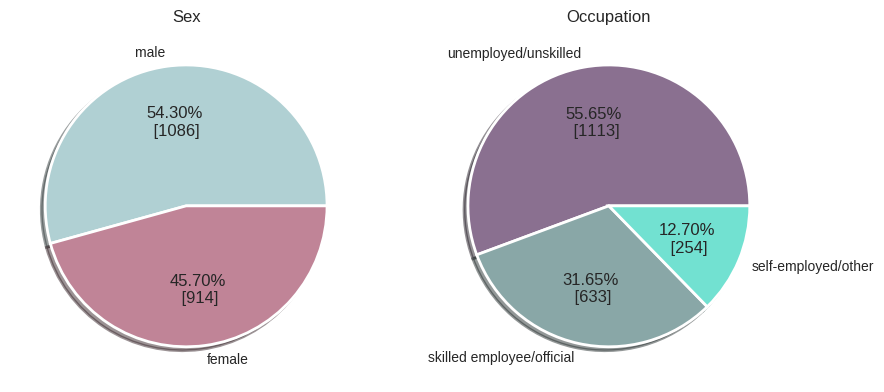

In [ ]:
plt.figure(figsize=(10, 5))

# Pie chart for Sex
plt.subplot(121, title='Sex')
plt.pie(data['Sex'].value_counts(), labels=['male', 'female'],
        autopct=lambda val: '{:1.2f}%\n [{:.0f}]'.format(val, val * data['Sex'].value_counts().sum() / 100),
        colors=["#B0D0D3", "#C08497"],
        wedgeprops=dict(width=1, edgecolor='white', linewidth=2), shadow=True)
plt.subplot(122, title='Occupation')
plt.pie(data['Occupation'].value_counts(), labels=['unemployed/unskilled','skilled employee/official','self-employed/other'],
        autopct=lambda val: '{:1.2f}%\n [{:.0f}]'.format(val,
                                        val * data['Occupation'].value_counts().sum() / 100),
        colors = ["#8a7090", "#89A7A7", "#72E1D1"],
        wedgeprops=dict(width=1, edgecolor='white',linewidth=2), shadow=True,)

plt.show()

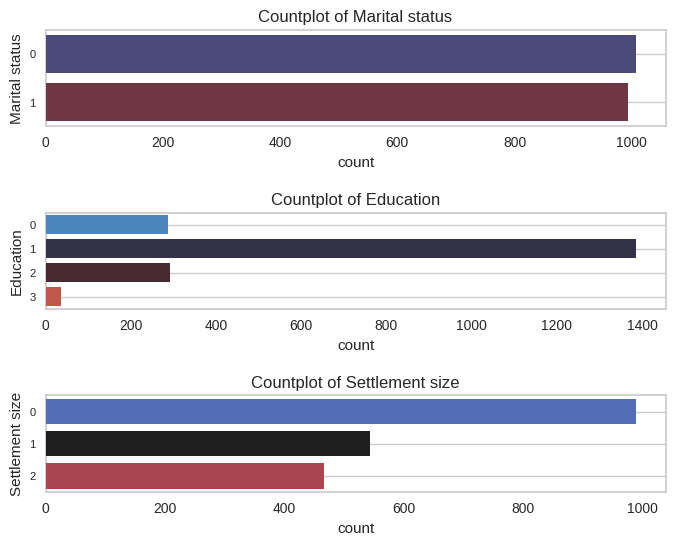

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.9, wspace=0.4)

# Menambahkan definisi feature_labels
feature_labels = {
    'Marital status': ['0', '1'],
    'Education': ['0', '1', '2', '3'],
    'Settlement size': ['0', '1', '2']
}

for i, feature in enumerate(['Marital status', 'Education', 'Settlement size']):
    plt.subplot(3, 1, i + 1)
    sns.countplot(data=data, y=feature, palette='icefire', width=0.8, zorder=3)
    plt.gca().set_yticklabels(feature_labels[feature], fontsize=8)
    plt.grid()
    plt.title('Countplot of {}'.format(feature))

plt.show()

**Jenis Kelamin**: Dataset ini berisi informasi dasar tentang 2000 pelanggan yang sebagian besar adalah laki-laki, khususnya 1086 pelanggan adalah laki-laki. Namun, kumpulan datanya cukup seimbang. seks.

**Status Perkawinan**: Label non-single di sini berarti bercerai / berpisah / menikah / duda. Seperti yang bisa kita lihat, jumlah orang yang lajang dan jumlah orang yang tidak lajang kira-kira sama.

**Pendidikan**: Dari data di dataset ini, kita dapat menyimpulkan bahwa gelar tertinggi yang dimiliki mayoritas pelanggan di mal supermarket ini adalah ijazah SMA. Terkadang orang dengan derajat pertama mampir, dan lebih jarang lagi orang dengan derajat lebih tinggi. Ada sebagian masyarakat yang tidak mencantumkan tingkat pendidikannya di kartu anggota atau menuliskan jenjang pendidikan lainnya.

**Pekerjaan**: Mayoritas pelanggan kami memiliki pekerjaan. Mengaitkan informasi ini dengan tingkat pendidikan pelanggan, kami melihat bahwa ada sekitar 600 pelanggan yang menganggur, yang diperkirakan adalah orang-orang yang saat ini tidak memiliki pekerjaan, siswa sekolah menengah atas/pelajar, orang lanjut usia atau pelanggan yang memutuskan untuk tidak menyebutkannya. dia. Selain itu, terdapat sekitar 200 pelanggan yang pekerjaannya antara lain: manajemen/wiraswasta/karyawan/petugas berkualifikasi tinggi.

**Ukuran pemukiman**: Setengah dari pelanggan tinggal di kota-kota kecil, sementara sisanya tinggal di kota-kota menengah atau besar.

Karena semua variabel kategori (jenis kelamin, status perkawinan, pendidikan, pekerjaan, dan ukuran pemukiman) dan tidak untuk usia dan income karena masih bertipe integer, maka disini buat create_temp_df untuk memberi mengganti nilai dalam beberapa kolom dari suatu dataframedengan nilai atau label yang lebih deskriptif.

In [ ]:
def create_temp_df(temp_df):
    temp_df = temp_df.copy()
    temp_df['Sex'] = temp_df['Sex'].replace(0, 'Male')
    temp_df['Sex'] = temp_df['Sex'].replace(1, 'Female')
    temp_df['Marital status'] = temp_df['Marital status'].replace(0, 'Single')
    temp_df['Marital status'] = temp_df['Marital status'].replace(1, 'Non-Single')
    temp_df['Education'] = temp_df['Education'].replace(0, 'Other/Unknown')
    temp_df['Education'] = temp_df['Education'].replace(1, 'High School')
    temp_df['Education'] = temp_df['Education'].replace(2, 'University')
    temp_df['Education'] = temp_df['Education'].replace(3, 'Graduate School')
    temp_df['Occupation'] = temp_df['Occupation'].replace(0, 'Unskilled Employee')
    temp_df['Occupation'] = temp_df['Occupation'].replace(1, 'Skilled Employee')
    temp_df['Occupation'] = temp_df['Occupation'].replace(2, 'Highly Qualified Employee')
    temp_df['Settlement size'] = temp_df['Settlement size'].replace(0, 'Small City')
    temp_df['Settlement size'] = temp_df['Settlement size'].replace(1, 'Mid-Sized City')
    temp_df['Settlement size'] = temp_df['Settlement size'].replace(2, 'Big City')
    return temp_df

In [ ]:
temp_df = create_temp_df(data)

In [ ]:
temp_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,Male,Single,67,University,124670,Skilled Employee,Big City
1,Female,Non-Single,22,High School,150773,Skilled Employee,Big City
2,Male,Single,49,High School,89210,Unskilled Employee,Small City
3,Male,Single,45,High School,171565,Skilled Employee,Mid-Sized City
4,Male,Single,53,High School,149031,Skilled Employee,Mid-Sized City
5,Male,Single,35,High School,144848,Unskilled Employee,Small City
6,Male,Single,53,High School,156495,Skilled Employee,Mid-Sized City
7,Male,Single,35,High School,193621,Highly Qualified Employee,Mid-Sized City
8,Male,Non-Single,61,University,151591,Unskilled Employee,Small City
9,Male,Non-Single,28,High School,174646,Highly Qualified Employee,Small City


Disini sudah terlihat bahwa berhasil memberikan label pada variabel kategori untuk meningkatkan pemahaman visualisasi data.

**1. Univariate Analysis**

Disini saya akan mengeksplorasi distribusi variabel kategori dan distribusi variabel continuous

**Distribusi Variabel CategoriCal**

In [ ]:
row_n = 3
col_n = 2

sex_counts = temp_df['Sex'].value_counts().sort_values(ascending=True)
marital_counts = temp_df['Marital status'].value_counts().sort_values(ascending=True)
education_counts = temp_df['Education'].value_counts().sort_values(ascending=True)
occupation_counts = temp_df['Occupation'].value_counts().sort_values(ascending=True)
settlement_counts = temp_df['Settlement size'].value_counts().sort_values(ascending=True)
categorical_lst = [sex_counts, marital_counts, education_counts, occupation_counts, settlement_counts]
categorical_labels = ['Sex', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

fig = make_subplots(rows=row_n, cols=col_n)

for i, col in enumerate(categorical_labels):
    fig.add_trace(
        go.Bar(
            x=categorical_lst[i].index.astype('str'),
            y=categorical_lst[i].values,
            name=col,
            text=np.round(categorical_lst[i].values,3),
            textposition='inside',
            marker_color=px.colors.sequential.Sunset,
            textfont=dict(size=10)),
        row=int(i/col_n)+1, col=int(i%col_n)+1
        )

fig.update_layout(
    height=800,
    title_text="Categorical Variable Distribution",
    template='simple_white')
fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.show()


Nah dapat kita lihat bahwa Karakteristik diatas ini relatif lebih terdistribusi dalam kumpulan data berupa:
1. Laki-laki
2. Single
3. tingkat pendidikan di sekolah menengah atas (SMA/SMK)
4. Pegawai yang terampil
5. tempat tinggalnya di kota kecil



```
# This is formatted as code
```

**Distribusi Variabel Continous**

In [ ]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Histogram(x=data['Age'], name='Age Histogram', marker_color='teal'),
    row=1, col=1
)

fig.add_trace(
    go.Box(y=data['Age'], name='Age Box Plot', marker_color='aqua'),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=data['Income'], name='Income Histogram', marker_color='teal'),
    row=2, col=1
)

fig.add_trace(
    go.Box(y=data['Income'], name='Income Box Plot', marker_color='aqua'),
    row=2, col=2
)

fig.update_layout(
    title_text='Continuous Variable Distribution',
    template='simple_white')
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.8)
fig.show()

Temuan: Pada temuan diatas dapat disaksikan bahwa pada populasi Usia sangat condong ke atas pada angka 20, dan sebagian besar berusia sekitar 26-27 tahun. dan yang memiliki Penghasilannya sedikit condong ke atas juga pada angka 100k, sehingga sebagian besar menghasilkan sekitar 100rb-126rb dalam USD.

**2. Multivariate Analysis**

Disini saya akan menganalisis hubungan antara gender dan variabel lainnya

**1. Gender and Marital Status**

In [ ]:
marital_colors=['plasma', 'magma']

gender_by_marital = pd.DataFrame(data.groupby('Sex')['Marital status'].value_counts())
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Single', 'Non-Single'],
                     values=[int(gender_by_marital.loc[0,0]), int(gender_by_marital.loc[0,1])],
                     textinfo='percent+value+label',
                     marker_colors=marital_colors,
                     name="Male"),
              1, 1)
fig.add_trace(go.Pie(labels=['Single', 'Non-Single'],
                     values=[int(gender_by_marital.loc[1,0]), int(gender_by_marital.loc[1,1])],
                     textinfo='percent+value+label',
                     marker_colors=marital_colors,
                     name="Female"),
              1, 2)

fig.update_traces(hole=.3, hoverinfo="label+percent+name",
                  marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.update_layout(
    title_text="Gender and Marital Status Distribution",
    annotations=[dict(text='Male', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Female', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

Temuan: Dapat dilihat dari visualisasi diatas, saya dapat menyimpulkan bahwa laki-laki single dan perempuan non-single cenderung berbelanja di FMCG ini karena proporsi laki-laki single relatif tinggi dibandingkan perempuan non-single .

**2. Gender and Education**

In [ ]:
Education_colors=['saddlebrow', 'vidris', 'yellow', '#68BB59']

gender_by_education = pd.DataFrame(data.groupby('Sex')['Education'].value_counts())
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=['Other/Unknown', 'High School', 'University', 'Graduate School'],
                     values=[int(gender_by_education.loc[0,0]), int(gender_by_education.loc[0,1]),
                            int(gender_by_education.loc[0,2]), int(gender_by_education.loc[0,3])],
                     textinfo='percent+value+label',
                     marker_colors=Education_colors,
                     name="Male"),
              1, 1)
fig.add_trace(go.Pie(labels=['Other/Unknown', 'High School', 'University', 'Graduate School'],
                     values=[int(gender_by_education.loc[1,0]), int(gender_by_education.loc[1,1]),
                            int(gender_by_education.loc[1,2]), int(gender_by_education.loc[1,3])],
                     textinfo='percent+value+label',
                     marker_colors=Education_colors,
                     name="Female"),
              1, 2)

fig.update_traces(hole=.3, hoverinfo="label+percent+name",
                  marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.update_layout(
    title_text="Gender and Education Distribution",
    annotations=[dict(text='Male', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Female', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

Temuan: pada hasil diatas dapat kita lihat pada laki-laki maupun perempuan sebagian besar berpendidikan SMA/SMK dan memiliki proporsi yang sama untuk tingkat pendidikan di universitas dan pasca sarjana. Tetapi di Laki-laki memiliki lebih banyak tingkat pendidikan lain/tidak diketahui dibandingkan perempuan.

**3. Gender, Marital Status, and Age**

In [ ]:
fig = px.histogram(temp_df, x='Sex', y='Age',
                 color='Marital status', barmode='group',
                 histfunc='avg', text_auto=True,
                 template='simple_white',
                 title='Gender, Age, and Marital Status Distribution',
                 color_discrete_sequence=['darkblue', '#26a7de'])

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.show()

Temuan: Nah untuk disini dapat dilihat bahwa perempuan maupun laki-laki single mempunyai pendapatan rata-rata lebih tinggi dibandingkan non-single. bahkan Secara keseluruhan, laki-laki memperoleh gaji rata-rata lebih tinggi dibandingkan perempuan. dan di tingkat usia 35-40

**3. Income Analysis**

In [ ]:
income_by_sex = data.groupby('Sex')['Income'].mean().sort_values(ascending=True)
income_by_marital = temp_df.groupby('Marital status')['Income'].mean().sort_values(ascending=True)
income_by_age = temp_df.groupby('Age')['Income'].mean()
income_by_education = temp_df.groupby('Education')['Income'].mean().sort_values(ascending=True)
income_by_occupation = temp_df.groupby('Occupation')['Income'].mean().sort_values(ascending=True)
income_by_settlement = temp_df.groupby('Settlement size')['Income'].mean().sort_values(ascending=True)
income_lst = [income_by_sex, income_by_marital, income_by_age, income_by_education, income_by_occupation, income_by_settlement]
income_labels = ['Sex', 'Marital Status', 'Age', 'Education', 'Occupation', 'Settlement Size']

row_n = 3
col_n = 2

fig = make_subplots(rows=row_n, cols=col_n)

for i, col in enumerate(income_labels):
    fig.add_trace(
        go.Bar(
            x=income_lst[i].index.astype('str'),
            y=income_lst[i].values,
            name=col,
            text=np.round(income_lst[i].values,3),
            textposition='inside',
            marker_color=px.colors.sequential.Sunset,
            textfont=dict(size=10)),
        row=int(i/col_n)+1, col=int(i%col_n)+1
        )

fig.update_layout(
    height=800,
    title_text="Bar Chart on Income Analysis",
    template='simple_white')
fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)
fig.show()

Temuan: Ternyata pembeli dari toko FMCG mayoritas Orang-orang dengan karakteristik yang memperoleh pendapatan rata-rata lebih tinggi yaitu pada:
1. Sex           :Laki-laki
2. Martial Status:Single
3. Age           :lebih tua
4. Education     :lulusan sekolah
5. Occupacation   :Pegawai yang berkualifikasi tinggi dan
tinggal di kota besar

# Clustering Model

Pada bagian ini, saya akan melakukan pemodelan KMeans untuk mengetahui segmentasi pelanggan


## General Variables and Functions Needed for Modelling

---

Disini saya menetapkan random_state sebagai 0 untuk model ini untuk menjaga konsistensi



In [ ]:
rs_value = 0

In [ ]:
def normality_test(feature):
    return stats.normaltest(feature)[1]

1. normality_test, dimana ini untuk mengembalikan nilai p dari uji normalitas distribusi. jadi, misal p-value kurang dari 0,05 maka hipotesisnya nol (distribusi normal) akan ditolak, artinya distribusi tidak berdistribusi normal.

In [ ]:
def power_log_normality_test(feature):

    # Power Transformation Test
    power_feature = PowerTransformer().fit_transform(feature.to_numpy().reshape(-1,1))
    power_normaltest = normality_test(power_feature.flatten())

    # Log Transformation Test
    log_feature = np.log(feature)
    log_normaltest = normality_test(log_feature)

    return power_normaltest, log_normaltest

2. power_log_normality_test, dimana ini untuk mengembalikan nilai p dari uji normalisasi distribusi dan Jika p-value kurang dari 0,05 maka hipotesisnya nol (distribusi normal) akan ditolak

In [ ]:
def visualize_silhouette(model, cluster_lists, X_features):

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(8*n_cols,8), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
            cluster = KMeans(n_clusters=n_cluster, n_init=10, max_iter=500, random_state=0)
            cluster_labels = cluster.fit_predict(X_features)

            sil_avg = silhouette_score(X_features, cluster_labels)
            sil_values = silhouette_samples(X_features, cluster_labels)

            y_lower = 10
            axs[ind].set_title('Number of Cluster: '+str(n_cluster) + ' Silhouette Score: '+ str(round(sil_avg,3)),
                           fontsize=10)
            axs[ind].set_xlabel('The silhouette coefficient value')

            for i in range(n_cluster):
              ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color=  cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_sil_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
            y_lower = y_upper + 10
            axs[ind].axvline(x=sil_avg, color="blue", linestyle="--")

3. visualize_silhouette, dimana ini akan mengembalikan visualisasi skor siluet. Ini digunakan untuk KMeans dengan menggunakan fungsi estimasi_bandwidth untuk penyetelan hyperparamter.

In [ ]:
def evaluate(model_labels):
    sil_avg = silhouette_score(data, model_labels)
    return sil_avg

4. evaluasi, dimana untuk mengembalikan skor siluet rata-rata yang diberikan model

### 1.Normality Test for Age and Income Distribution

In [ ]:
age_normaltest = normality_test(data['Age'])
power_age_normaltest, log_age_normaltest = power_log_normality_test(data['Age'])

print(f'Age Normal Distribution P-Value: {age_normaltest}')
print(f'Power Age Normal Distribution P-Value: {power_age_normaltest}')
print(f'Log Age Normal Distribution P-Value: {log_age_normaltest}')

Age Normal Distribution P-Value: 3.3428344869999675e-56
Power Age Normal Distribution P-Value: 9.92408801400393e-36
Log Age Normal Distribution P-Value: 7.519702564848323e-25


Temuan: Dari hasil diatas, maka bisa kita lihat distribusi pada usia normal, transformasinya TIDAK memiliki distribusi normal karena nilai p-nya lebih kecil dari 0,05. Namun, karena distribusi usia transformasi pada log memiliki nilai p 0,7 terbesar dibandingkan distribusi lainnya, saya akan mencoba melanjutkan distribusi usia ke preprocessing.

In [ ]:
income_normaltest = normality_test(data['Income'])
power_income_normaltest, log_income_normaltest = power_log_normality_test(data['Income'])

print(f'Income Normal Distribution P-Value: {income_normaltest}')
print(f'Power Income Normal Distribution P-Value: {power_income_normaltest}')
print(f'Log Income Normal Distribution P-Value: {log_income_normaltest}')

Income Normal Distribution P-Value: 2.5009638879187734e-98
Power Income Normal Distribution P-Value: 8.921729867143389e-07
Log Income Normal Distribution P-Value: 9.41366371618838e-08


Temuan: Dari analisis diatas, kita temukan distribusi income normal, tranformasinya TIDAK memiliki distribusi normal karena nilai p-nya lebih kecil dari 0,05. Namun karena distribusi income yang ditransformasikan dengan power memiliki nilai p 0,8 terbesar dibandingkan dengan distribusi lainnya, saya akan mengubah distribusi income dengan power di bagian preprocessing.

### 2.Preprocessing Data

---

Pada bagian ini, saya akan memproses data terlebih dahulu:

1. Power transform income & Log transform age dimana Uji Normalitas usia dan Distribusi income
2. Melakukan MinMax untuk semua data agar setiap variabel memiliki dampak yang sebanding pada hasil pengelompokan. Misalnya, karena Income memiliki kisaran yang sangat tinggi dibandingkan variabel lain seperti Sex atau Marital status, variabel income mungkin mendominasi pengaruh pengelompokan.

In [ ]:
def preprocess(df):

    X_features = df.copy()

    # Power Transform Income, Log Transform Age
    power_income = PowerTransformer().fit_transform(df['Income'].to_numpy().reshape(-1,1))
    power_income = pd.Series(data=power_income.flatten(), index=list(range(len(power_income.flatten()))))
    log_age = np.log(df['Age'])
    df['Power_Income'] = power_income
    df['Log_Age'] = log_age
    X_features = df.drop(columns=['Income', 'Age'], inplace=False)

    # MinMax Scaling
    scaler = MinMaxScaler()
    X_features = scaler.fit_transform(X_features)

    return X_features

In [ ]:
 X_features = preprocess(data)



```
# This is formatted as code
```

### 3.Mencari KMeans dengan parameter terbaik

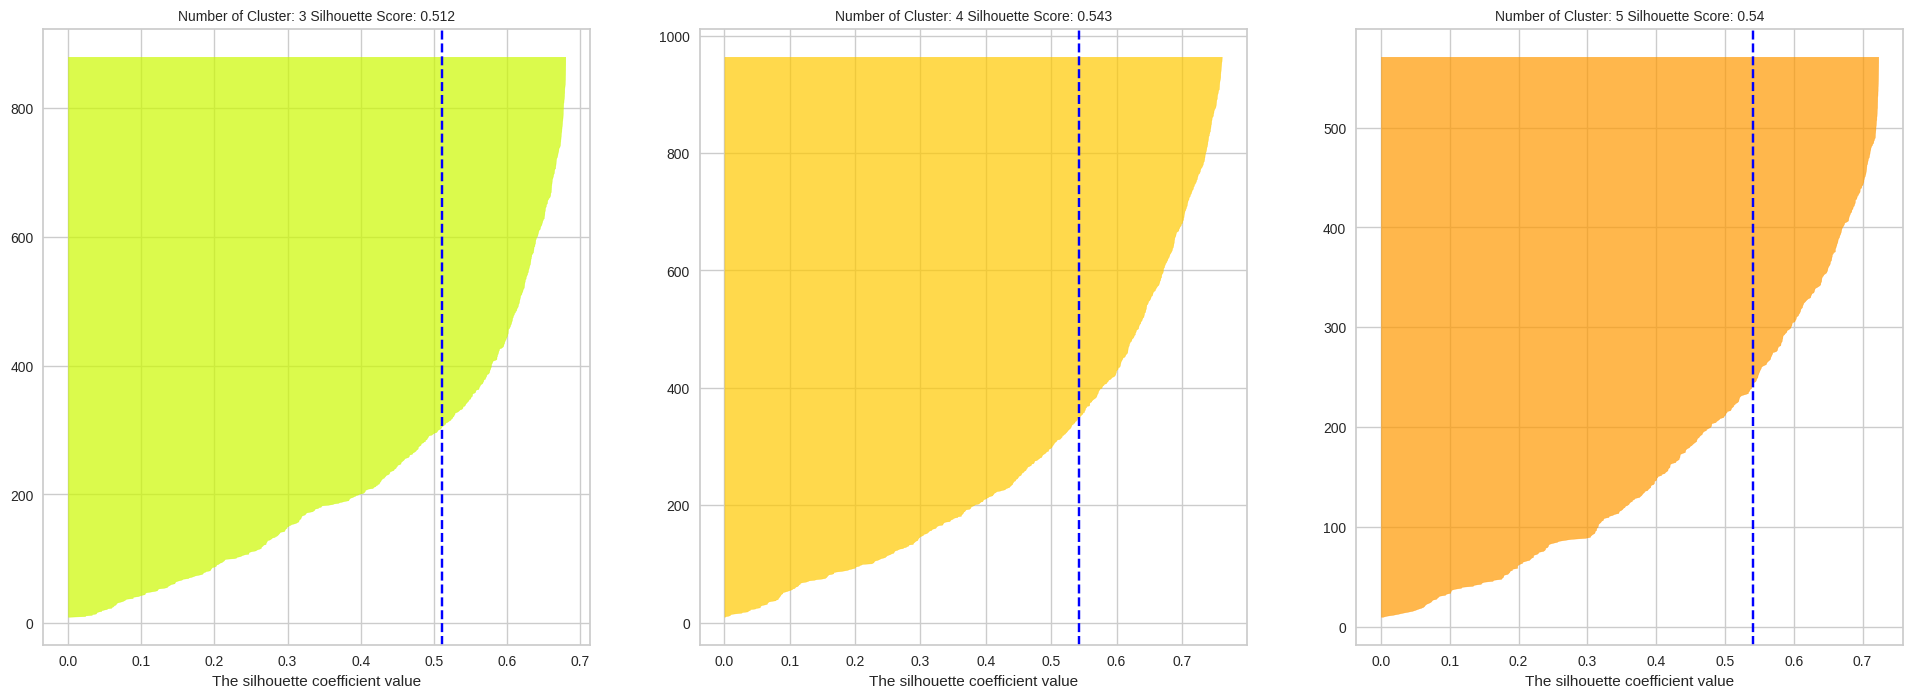

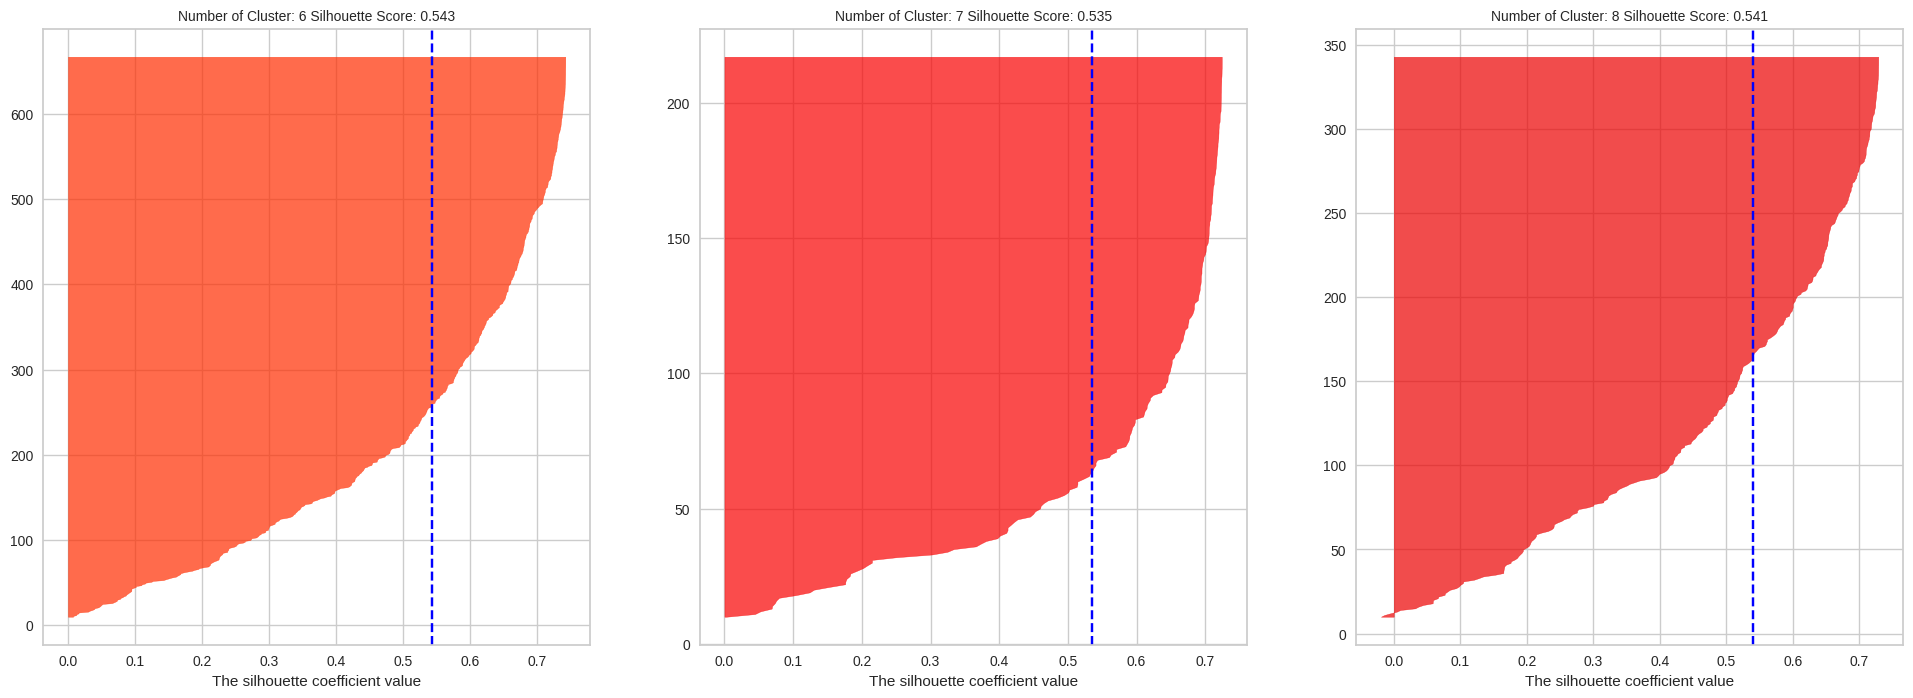

In [ ]:
X_with_labels=visualize_silhouette('KMeans', [3,4,5], data)
X_with_labels=visualize_silhouette('KMeans', [6,7,8], data)

Temuan: Dari visualisasi Diatas dapat kita lihat bahwa KMeans dengan 7 cluster memiliki rata-rata skor siluet tertinggi yaitu 0,543 dan memiliki skor siluet yang lebih mirip untuk setiap clusternya.

In [ ]:
kmeans = KMeans(n_clusters=7, n_init=10, max_iter=500, random_state=0)
kmeans_labels = kmeans.fit_predict(X_features)
data['Cluster_label'] = kmeans_labels

# Model Evaluation

---
Disini saya akan mengevaluasi skor siluet rata-rata untuk setiap model, kemudian memvisualisasikannya


In [ ]:
models = [data['Cluster_label']]
scores = [evaluate(model) for model in models]
model_labels = ['KMeans']

In [ ]:
models_df = pd.Series(scores, index=model_labels, name='scores').sort_values(ascending=True)

fig = px.bar(x=models_df.index, y=models_df.values,
             text=np.round(models_df.values,5),
             color=models_df.values,
             color_continuous_scale='ice')

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5,
                  opacity=0.8)

fig.update_layout(
    title_text='Modelling',
    xaxis=dict(
        title='Model',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Average Silhouette Score',
        titlefont_size=16
    ),
    template='simple_white',
)
fig.show()

Temuan: Dari hasil diatas dapat dilihat bahwa, KMeans memiliki rata-rata skor siluet yang tinggi yaitu 0.13132

In [ ]:
pca = PCA(n_components=2, random_state=rs_value)
pca_transformed = pca.fit_transform(X_features)

data['ftr1'] = pca_transformed[:, 0]
data['ftr2'] = pca_transformed[:, 1]

In [ ]:
def visualize_clusters(model, model_labels):
    fig = px.scatter(data, x='ftr1', y='ftr2', color=model_labels)
    fig.update_layout(
        title_text=f'Scatter Plot on {model} Clustering',
        template='simple_white'
    )
    fig.update_traces(opacity=0.6)
    fig.show()

In [ ]:
model_names = ['Kmeans']
cluster_models = ['Cluster_label']
for i in range(len(cluster_models)):
    visualize_clusters(model_names[i], cluster_models[i])

Temuan: Dari visualisasi diatas, saya dapat melihat dengan jelas bahwa KMeans memiliki kinerja yang baik karena cluster TIDAK bertumpuk satu sama lain.

### Further Analysis

---
Disini saya akan mengevaluasi setiap cluster KMeans untuk melihat karakteristik apa yang dimiliki setiap cluster karena cluster KMeans memiliki kinerja yang baik

**General Functions Needed for Further Analysis**

---
Melakukan analisis lebih lanjut


In [ ]:
def visualize_categorical_vars(df):

    sex_counts = df['Sex'].value_counts().sort_values(ascending=True)
    marital_counts = df['Marital status'].value_counts().sort_values(ascending=True)
    education_counts = df['Education'].value_counts().sort_values(ascending=True)
    occupation_counts = df['Occupation'].value_counts().sort_values(ascending=True)
    settlement_counts = df['Settlement size'].value_counts().sort_values(ascending=True)
    categorical_lst = [sex_counts, marital_counts, education_counts, occupation_counts, settlement_counts]
    categorical_labels = ['Sex', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']

    row_n=3
    col_n=2

    fig = make_subplots(rows=row_n, cols=col_n)

    for i, col in enumerate(categorical_labels):
        fig.add_trace(
            go.Bar(
                x=categorical_lst[i].index.astype('str'),
                y=categorical_lst[i].values,
                name=col,
                text=np.round(categorical_lst[i].values,3),
                textposition='inside',
                marker_color=px.colors.sequential.ice,
                textfont=dict(size=10)),
            row=int(i/col_n)+1, col=int(i%col_n)+1
            )

    fig.update_layout(
        height=800,
        title_text="Categorical Variable Distribution",
        template='simple_white')
    fig.update_traces(marker_line_color='black',
                      marker_line_width=1.5,
                      opacity=0.8)
    fig.show()

1. visualize_categorical_vars, dimana gunanya untuk mengembalikan visualisasi variabel kategori berdasarkan kerangka data

In [ ]:
def visualize_continuous_vars(df):
    fig = make_subplots(rows=2, cols=2)

    fig.add_trace(
        go.Histogram(x=df['Age'], name='Age Histogram', marker_color='teal'),
        row=1, col=1
    )

    fig.add_trace(
        go.Box(y=df['Age'], name='Age Box Plot', marker_color='aqua'),
        row=1, col=2
    )

    fig.add_trace(
        go.Histogram(x=df['Income'], name='Income Histogram', marker_color='teal'),
        row=2, col=1
    )

    fig.add_trace(
        go.Box(y=df['Income'], name='Income Box Plot', marker_color='aqua'),
        row=2, col=2
    )

    fig.update_layout(
        title_text='Continuous Variable Distribution',
        template='simple_white')
    fig.update_traces(
        marker_line_color='black',
        marker_line_width=1.5,
        opacity=0.8)
    fig.show()

2. Ada visualize_continuous_vars, disini juga untuk mengembalikan visualisasi variabel kontinu yang diberikan dataframe

In [ ]:
data = data.iloc[:,:7]
data['kmeans_labels'] = kmeans_labels
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans_labels
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,5
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2


## Evaluasi Setiap Cluster

---

Pada evaluasi di setiap cluster, cluster ini memiliki K Optimal = 7 cluster yang dimulai dari cluster 0

### Cluster 0

In [ ]:
cluster_zero = data.loc[data['kmeans_labels']==0]
cluster_zero = create_temp_df(cluster_zero)
visualize_categorical_vars(cluster_zero)
visualize_continuous_vars(cluster_zero)


Temuan: Dimana dapat kita lihat orang yang berada di cluster 0 memiliki ciri-ciri:
1. perempuan
2. non-single
3. tingkat pendidikannya ada di sekolah menengah atas (SMA/SMK)
4. populasi pegawai ternyata tidak terampil/ tidak memiliki skill
5. yang berada di tempat tinggal di kota kecil
6. yang sebagian besar berusia 26-27 tahun
7. dan hanya mendapatkan penghasilan sekitar 102-103k

### Cluster 1

In [ ]:
cluster_one = data.loc[data['kmeans_labels']==1]
cluster_one = create_temp_df(cluster_one)
visualize_categorical_vars(cluster_one)
visualize_continuous_vars(cluster_one)

Temuan: Pada cluster 1 Orang yang diberi label cluster 1 mempunyai ciri-ciri:

1. Laki-laki
2. Single
3. Tingkat pendidikanya di sekolah menengah atas (SMA/SMK)
4. Populasi pegawainya tidak terampil/ tidak memiliki skill
5. Berada di tempat tinggal di kota kecil
6. Di sebagian besar berusia 35-39 tahun
7. Dan mendapatkan penghasilan sekitar 102-104k

### Cluster 2

In [ ]:
cluster_two = data.loc[data['kmeans_labels']==2]
cluster_two = create_temp_df(cluster_two)
visualize_categorical_vars(cluster_two)
visualize_continuous_vars(cluster_two)

Temuan: Pada cluster 2 ternyata Orang yang diberi label cluster 2 mempunyai ciri-ciri:

1. Laki-laki
2. Single
3. Di tingkat pendidikan di sekolah menengah atas (SMA/SMK)
4. Populasi pegawai yang terampil/Memiliki skill
5. Yang bertempat tinggal di kota besar
6. Di sebagian besar berusia 35-39 tahun
7. Dan mendapatkan penghasilan sekitar 134-140k

### Cluster 3

In [ ]:
cluster_three = data.loc[data['kmeans_labels']==3]
cluster_three = create_temp_df(cluster_three)
visualize_categorical_vars(cluster_three)
visualize_continuous_vars(cluster_three)

Temuan: Disini Orang yang diberi label cluster 3 mempunyai ciri-ciri:

1. Laki-laki
2. Non-single
3. Pada tingkat pendidikan di sekolah menengah atas (SMA/SMK)
4. Populasi pegawai  yang terampil/ Memiliki skill
5. Berdomisili di kota menengah dan besar
6. Ada di sebagian besar berusia 25-29 tahun
7. Dan mendapatkan penghasilan sekitar 125-133k

### Cluster 4

In [ ]:
cluster_four = data.loc[data['kmeans_labels']==4]
cluster_four = create_temp_df(cluster_four)
visualize_categorical_vars(cluster_four)
visualize_continuous_vars(cluster_four)

Temuan: Pada temuan di cluster 4 ada Orang yang diberi label cluster 4 mempunyai ciri-ciri:

1. Perempuan
2. Single
3. Ditingkat pendidikan di sekolah menengah atas (SMA/SMK)
4. Populasi pegawai yang tidak terampil/ tidak memiliki skill
5. Bertempat tinggal di kota kecil
6. Dari sebagian besar berusia 35-39 tahun
7. Dan mendapatkan penghasilan sekitar 95-106k

### Cluster 5

In [ ]:
cluster_five = data.loc[data['kmeans_labels']==5]
cluster_five = create_temp_df(cluster_five)
visualize_categorical_vars(cluster_five)
visualize_continuous_vars(cluster_five)

Temuan: Disini Orang yang diberi label cluster 5 mempunyai ciri-ciri:

1. Perempuan
2. non-Single
3. Pada tingkat pendidikan di sekolah menengah atas (SMA/SMK)
4. Populasi pegawai yang terampil/Memiliki skill
5. Berada di tempat tinggal di kota menengah
6. Di sebagian besar berusia 25-29 tahun
7. Dan mendapatkan penghasilan sekitar 121-130k

### Cluster 6

In [ ]:
cluster_six = data.loc[data['kmeans_labels']==6]
cluster_six = create_temp_df(cluster_six)
visualize_categorical_vars(cluster_six)
visualize_continuous_vars(cluster_six)

Temuan: Pada hasil ini Orang yang diberi label cluster 6 mempunyai ciri-ciri:

1. Laki-laki
2. non-Single
3. Memiliki tingkat pendidikan di sekolah menengah atas (SMA/SMK)
4. Pada populasi pegawai yang tidak terampil/ Tidak memiliki skill
5. BerTempat tinggal di kota kecil
6. Pada sebagian besar berusia 25-29 tahun
7. Dan mendapatkan penghasilan sekitar 90-100rb

#Analisis Kesimpulan Nilai Tengah ( Median )

**Kesimpulan**

Cluster 0
* Jenis Kelamin :Perempuan
* Status        :Non-Single
* Umur          :28
* Pendidikan    :HighSchool/University
* Pendapatan    :102.3235k
* Pekerjaan     :tidak terampil/tidak diketahui
* Tempat Tinggal:Kota Kecil

Cluster 1
* Jenis Kelamin :Laki laki
* Status        :Single
* Umur          :36
* Pendidikan    :HighSchool/other/unknown
* Pendapatan    :103.6185k
* Pekerjaan     :tidak terampil/tidak diketahui
* Tempat Tinggal:Kota Besar

Cluster 2
* Jenis Kelamin :Laki Laki
* Status        :Single
* Umur          :37
* Pendidikan    :HighSchool/other/unknown
* Pendapatan    :136.323k
* Pekerjaan     :Pekerja Terampil
* Tempat Tinggal:Kota Besar

Cluster 3
* Jenis Kelamin :Laki Laki
* Status        :Non-Single
* Umur          :32
* Pendidikan    :HighSchool/University
* Pendapatan    :129.6525k
* Pekerjaan     :Pekerja Terampil
* Tempat Tinggal:Kota kecil

Cluster 4
* Jenis Kelamin :Perempuan
* Status        :Single
* Umur          :34
* Pendidikan    :HighSchool/other/unknown
* Pendapatan    :101.511k
* Pekerjaan     :tidak terampil/tidak diketahui
* Tempat Tinggal:Kota menengah

Cluster 5
* Jenis Kelamin :Perempuan
* Status        :Non-Single
* Umur          :29
* Pendidikan    :HighSchool/University
* Pendapatan    :126.7785k
* Pekerjaan     :Pekerja Terampil
* Tempat Tinggal:Kota Besar

Cluster 6
* Jenis Kelamin :Laki Laki
* Status        :Non-Single
* Umur          :28
* Pendidikan    :HighSchool-University
* Pendapatan    :95.492k
* Pekerjaan     :tidak terampil/tidak diketahui
* Tempat Tinggal:Kota kecil




